In [2]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import cumulative_trapezoid
from tabulate import tabulate
import matplotlib
import piecewise_regression
import json

In [3]:
def mean(arr):
    return np.mean(arr)

def error(x):
    return x.std() / np.sqrt(x.size)

def weighted_error(x, err):
    
    x = np.asarray(x)
    err = np.asarray(err)
    
    average = np.sum(x/(err**2))/np.sum(1/err**2)
    
    average_error = 1/np.sqrt(np.sum(1/err**2))
    
    return average, average_error

def decimal(x):
    return x.replace(',', '.').encode()

def sum_err(x,sx):
    return np.sum(x),np.sqrt(np.sum([np.sum(i**2) for i in sx])) 

def diff_err(x,sx):
    return x[0]-x[1],np.sqrt(np.sum([np.sum(i**2) for i in sx])) 

def times_err(x,sx):
    return np.prod(x), np.prod(x)*np.sqrt(np.sum([np.sum((i/j)**2) for i,j in zip(sx,x)]))

#def frac_err(x,sx):
#    return x[0]/x[1], x[0]/x[1]*np.sqrt(np.sum((sx/x)**2))

def frac_err(x,sx):
    return x[0]/x[1], x[0]/x[1]*np.sqrt(np.sum([np.sum((i/j)**2) for i,j in zip(sx,x)]))
    #return [np.sum((i/j)**2) for i,j in zip(sx,x)]

In [229]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# ULOHA 1

## DATA

In [271]:
sigv = 72.75 ###lih 22,55 10^-3 N/m
m = 55.1729
mv = np.array([57.4566,57.3501,57.3723,56.6658,56.6732,59.3021]) - m
smv = 0.08
ml = np.array([55.9256,55.9275,55.9047,55.6102,55.6170,56.4216]) - m 
sml = 0.02
tl = np.array([14.12,21.8,14.89,9.15,61.76,18.85])
k = np.array([30,30,30,20,20,50])
mv,ml,tl

(array([2.2837, 2.1772, 2.1994, 1.4929, 1.5003, 4.1292]),
 array([0.7527, 0.7546, 0.7318, 0.4373, 0.4441, 1.2487]),
 array([14.12, 21.8 , 14.89,  9.15, 61.76, 18.85]))

## Korekce na odparovani

In [272]:
def linear(x,a,b):
    return a*x + b

In [273]:
t = np.array([0,10,20,30,40,50])
m = np.array([0,0.0002,0.0004,0.0006,0.0008,0.0009])

params,err = curve_fit(linear, t,m)

a,b = params
a,b

(1.8571428535698408e-05, 1.904762035772481e-05)

C:\Users\stepa\AppData\Local\Temp/ipykernel_1316/1283002651.py:21: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


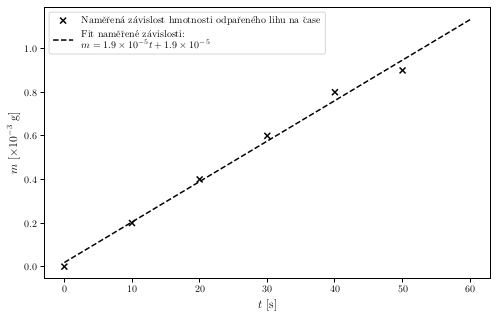

In [274]:
x_range = np.linspace(0,60,50)

plt.figure(figsize = (8,5))


plt.scatter(t,m*10**3,color = 'k',marker='x',label = 'Naměřená závislost hmotnosti odpařeného lihu na čase')
plt.plot(x_range,linear(x_range,a,b)*10**3, color = 'k', linestyle = 'dashed', label = "Fit naměřené závislosti: \n" + r"$m = 1.9 \times 10^{-5} t + 1.9 \times 10^{-5}$")

#plt.legend(loc='upper left', fontsize=11)

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', fontsize=10)


#popisky os
plt.ylabel("$m$ " + r"[$\times 10^{-3}$ g]", fontsize=12)
plt.xlabel("$t$ [s]", fontsize=12)

plt.savefig('odparovani.pdf', bbox_inches = 'tight')
plt.show()

## Tabulky

In [275]:
T = np.array([k, mv,ml,tl]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrr}
\toprule
 30 & 2.2837 & 0.7527 & 14.12 \\
 30 & 2.1772 & 0.7546 & 21.8  \\
 30 & 2.1994 & 0.7318 & 14.89 \\
 20 & 1.4929 & 0.4373 &  9.15 \\
 20 & 1.5003 & 0.4441 & 61.76 \\
 50 & 4.1292 & 1.2487 & 18.85 \\
\bottomrule
\end{tabular}


In [276]:
T = np.array([t, m]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rr}
\toprule
  0 & 0      \\
 10 & 0.0002 \\
 20 & 0.0004 \\
 30 & 0.0006 \\
 40 & 0.0008 \\
 50 & 0.0009 \\
\bottomrule
\end{tabular}


In [277]:
T = np.array([k, sigl_arr, sigl_err, sigl2_arr, sigl2_err]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrr}
\toprule
 30 & 23.9692 & 1.05388  & 23.9782 & 1.05427  \\
 30 & 25.2004 & 1.14173  & 25.2146 & 1.14237  \\
 30 & 24.1961 & 1.10085  & 24.2059 & 1.10129  \\
 20 & 21.3007 & 1.50065  & 21.3099 & 1.50129  \\
 20 & 21.478  & 1.49907  & 21.5345 & 1.50302  \\
 50 & 21.9936 & 0.552865 & 22.0001 & 0.553028 \\
\bottomrule
\end{tabular}


## Sigma bez korekce

In [278]:
sigl2_arr = ml/mv * sigv
sigl2_err = sigl2_arr * np.sqrt((smv/mv)**2+(sml/ml)**2)
sigl2_arr, sigl2_err

(array([23.97816044, 25.21456458, 24.20589706, 21.30991694, 21.53454309,
        22.00012714]),
 array([1.05427054, 1.14236777, 1.10129051, 1.50129418, 1.50302   ,
        0.55302799]))

In [279]:
sigl2, ssigl2 = weighted_error(sigl2_arr,sigl2_err)
print('sigl = {} +- {}'.format(sigl2, ssigl2))

sigl = 22.83502317409475 +- 0.3878851511061697


## Vypocet sigma s korekci

In [280]:
mean(mv/k), mean(ml/k)

(0.07570900000000007, 0.023946777777777813)

In [281]:
sigl_arr = (ml-10*linear(tl,a,b))/mv * sigv
sigl_err = sigl_arr * np.sqrt((smv/mv)**2+(sml/ml)**2)
sigl_arr, sigl_err

(array([23.88855654, 25.07291902, 24.10812873, 21.2178276 , 20.96913693,
        21.93509418]),
 array([1.05033084, 1.13595039, 1.09684236, 1.49480644, 1.46355704,
        0.55139323]))

In [282]:
sigl, ssigl = weighted_error(sigl_arr,sigl_err)
print('sigl = {} +- {}'.format(sigl, ssigl))

sigl = 22.714817306911762 +- 0.3858696290637896


# ULOHA 2

## Lehci

In [285]:
r = 5.96 /2000
sr = 0.01 / 2000
m = (31.5619-22.9567)/10000
sm = np.sqrt(2*0.001**2)/10000
h = 0.6
sh = 0.02
T = 21.2
sT = 0.1
R = 1.5/100
sR = 0.1/100
l = 20 /100
sl = 0.1 /100

t = np.array([3.8,3.85,3.9,3.7,3.8,3.8,3.85,3.7,3.8,3.8])
m,r

(0.00086052, 0.00298)

In [286]:
(31.5619-22.9567)/10, np.sqrt(2*0.001**2)/10

(0.86052, 0.0001414213562373095)

In [287]:
rool = 961/(1+0.69/10**3*(T-18))
#srool = 961*sT/(1+0.69/10**3*(T-18))**2
srool = rool * 0.1/21.1
rool,srool

(958.8827868067308, 4.5444681839181555)

In [288]:
ro = m/(4/3 * np.pi * r**3)
sro = ro * np.sqrt((sm/m)**2+(3*r**2*sr/r**3)**2)
ro,sro

(7762.89240871597, 39.09578323745299)

In [289]:
dro = ro - rool
sdro = np.sqrt(sro**2 + srool**2)
dro,sdro 

(6804.009621909239, 39.359020033844274)

In [290]:
u = l/mean(t)
su = u * np.sqrt((sl/l)**2+(error(t)/mean(t))**2)
u,su

(0.05263157894736843, 0.00036931555750618786)

In [291]:
n1 = (2/9) * ((9.81*r**2)/u) * dro * 1/((1 + 2.4*r/R)*(1+3.3*r/h))
sn1 = n1 * np.sqrt((su/u)**2 + (sdro/ro)**2 + 2*(sr/r)**2 + (sr/r)**2 + (sh/h)**2 + (sR**2 + (2.4*sr)**2)/(R + 2.4*r)**2 + (sh**2 + (3.3*sr)**2)/(h + 3.3*r)**2 )
n1,sn1

(1.6673450120176594, 0.1094395728319802)

In [292]:
n1b = (2/9) * ((9.81*r**2)/u) * dro
sn1b = n1b * np.sqrt((su/u)**2 + (sdro/ro)**2 + 2*(sr/r)**2)
n1b,sn1b

(2.5026927862620036, 0.02246506789030281)

## Tezsi

In [301]:
r = 4.72 /2000
sr = 0.01 / 2000
m = (33.8212-29.4266)/10000
sm = np.sqrt(2*0.001**2)/10000
h = 0.6
sh = 0.02
T = 21.2
sT = 0.1
R = 1.5/100
sR = 0.1/100
l = 20 /100
sl = 0.1 /100

t = np.array([5.4,5.4,5.4,5.4,5.4,5.3,5.4,5.3,5.3,5.35])
m,r

(0.0004394599999999997, 0.0023599999999999997)

In [303]:
T = np.array([t])

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrrrrrrr}
\toprule
 5.4 & 5.4 & 5.4 & 5.4 & 5.4 & 5.3 & 5.4 & 5.3 & 5.3 & 5.35 \\
\bottomrule
\end{tabular}


In [294]:
rool = 961/(1+0.69/10**3*(T-18))
#srool = 961*sT/(1+0.69/10**3*(T-18))**2
srool = rool * 0.1/21.1
rool,srool

(958.8827868067308, 4.5444681839181555)

In [295]:
ro = m/(4/3 * np.pi * r**3)
sro = ro * np.sqrt((sm/m)**2+(3*r**2*sr/r**3)**2)
ro,sro

(7981.687737727147, 50.796048973453836)

In [296]:
dro = ro - rool
sdro = np.sqrt(sro**2 + srool**2)
dro,sdro 

(7022.804950920416, 50.99892922785894)

In [297]:
u = l/mean(t)
su = u * np.sqrt((sl/l)**2+(error(t)/mean(t))**2)
u,su

(0.037278657968313145, 0.00021099637371308337)

In [298]:
n2 = (2/9) * ((9.81*r**2)/u) * dro * 1/((1 + 2.4*r/R)*(1+3.3*r/h))
sn2 = n2 * np.sqrt((su/u)**2 + (sdro/ro)**2 + 2*(sr/r)**2 + (sr/r)**2 + (sh/h)**2 + (sR**2 + (2.4*sr)**2)/(R + 2.4*r)**2 + (sh**2 + (3.3*sr)**2)/(h + 3.3*r)**2 )
n2, sn2

(1.6391052142508158, 0.11144119721969763)

In [299]:
n2b = (2/9) * ((9.81*r**2)/u) * dro
sn2b = n2b * np.sqrt((su/u)**2 + (sdro/ro)**2 + 2*(sr/r)**2)
n2b,sn2b

(2.2873405899860355, 0.020692312594124317)

## Tabuka

In [300]:
print('Tezsi kulicka bez korekce: {} +- {}'.format(n1b,sn1b))
print('Lehci kulicka bez korekce: {} +- {}'.format(n2b,sn2b))
print('Tezsi kulicka s korekci: {} +- {}'.format(n1,sn1))
print('Lehci kulicka s korekci: {} +- {}'.format(n2,sn2))

Tezsi kulicka bez korekce: 2.5026927862620036 +- 0.02246506789030281
Lehci kulicka bez korekce: 2.2873405899860355 +- 0.020692312594124317
Tezsi kulicka s korekci: 1.6673450120176594 +- 0.1094395728319802
Lehci kulicka s korekci: 1.6391052142508158 +- 0.11144119721969763
